# Image filtering and correction
## Tasks
* Substract from the original image its filtered copy
* Filter Lena from salt and pepper
* Make intensity correction by R(x, y, sigma) = log[I(x, y)] — log[I(x, y)*G(x, y, sigma)]
,where G - gaussian, sigma - coef of blurring, * - convolution
remapping of image from (-1,1) to (0,255) with I = 255*I + 127


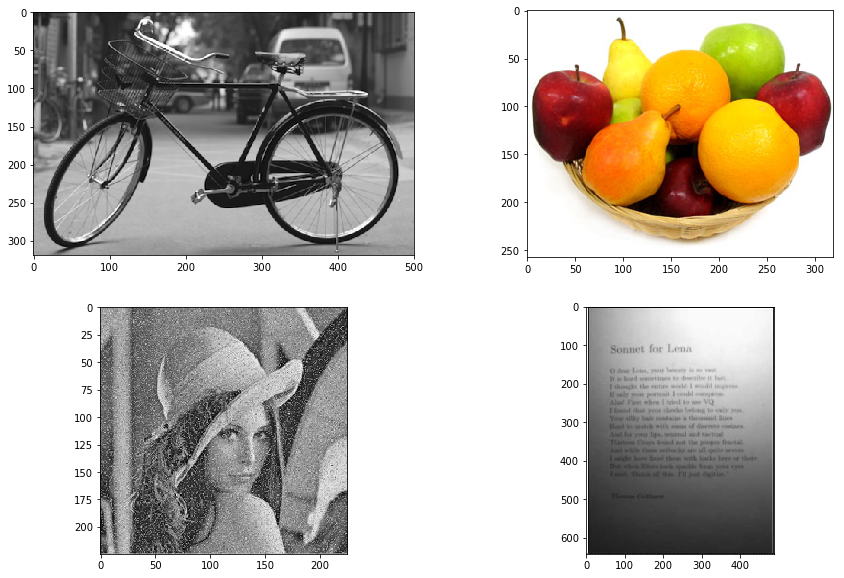

In [200]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
imbyc = img.imread('./bycicle.png')
imlen = img.imread('./lena.jpg')
imfru = img.imread('./unnamed.png')
imbook = img.imread('./book.png')
fig = plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(imbyc,cmap='gray')
plt.subplot(222)
plt.imshow(imfru)
plt.subplot(223)
plt.imshow(imlen)
plt.subplot(224)
plt.imshow(imbook)


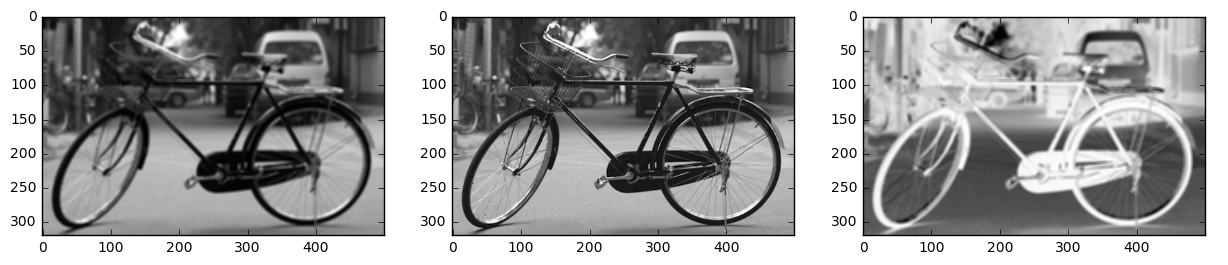

In [2]:
from scipy import ndimage
import numpy as np
k = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
flt = ndimage.convolve(imbyc, k, mode='nearest', cval=0.0)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-flt),cmap='gray')


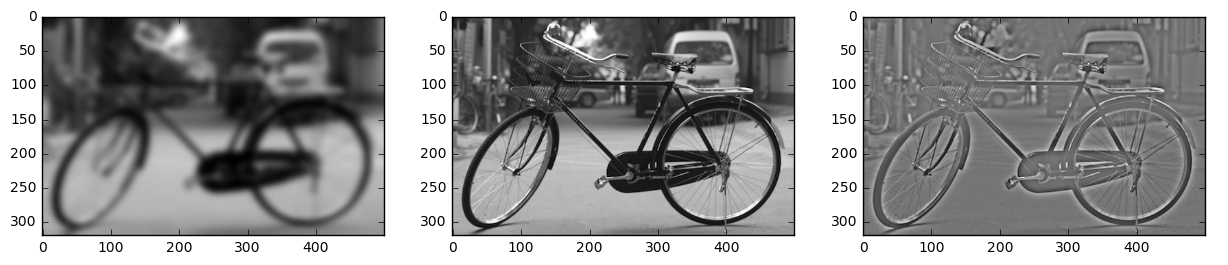

In [4]:
from scipy import ndimage as nimg
import numpy as np
gflt = nimg.gaussian_filter(imbyc, sigma=5)
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(gflt,cmap='gray')
plt.subplot(132)
plt.imshow(imbyc,cmap='gray')
plt.subplot(133)
plt.imshow((imbyc-gflt),cmap='gray')

-6.12454 1.80338


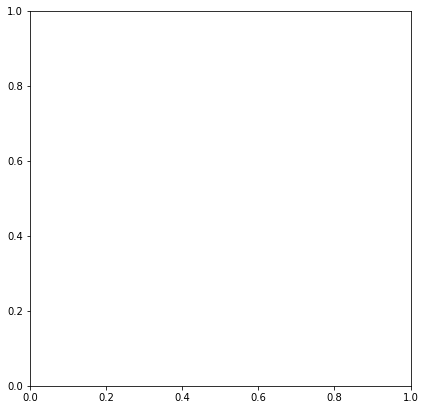

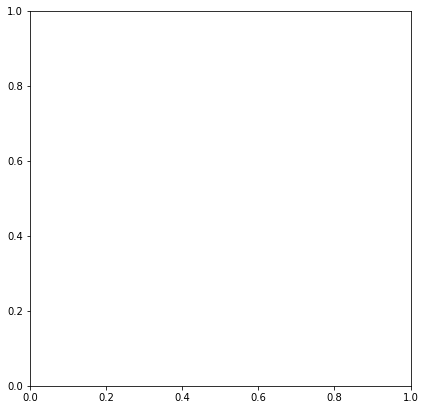

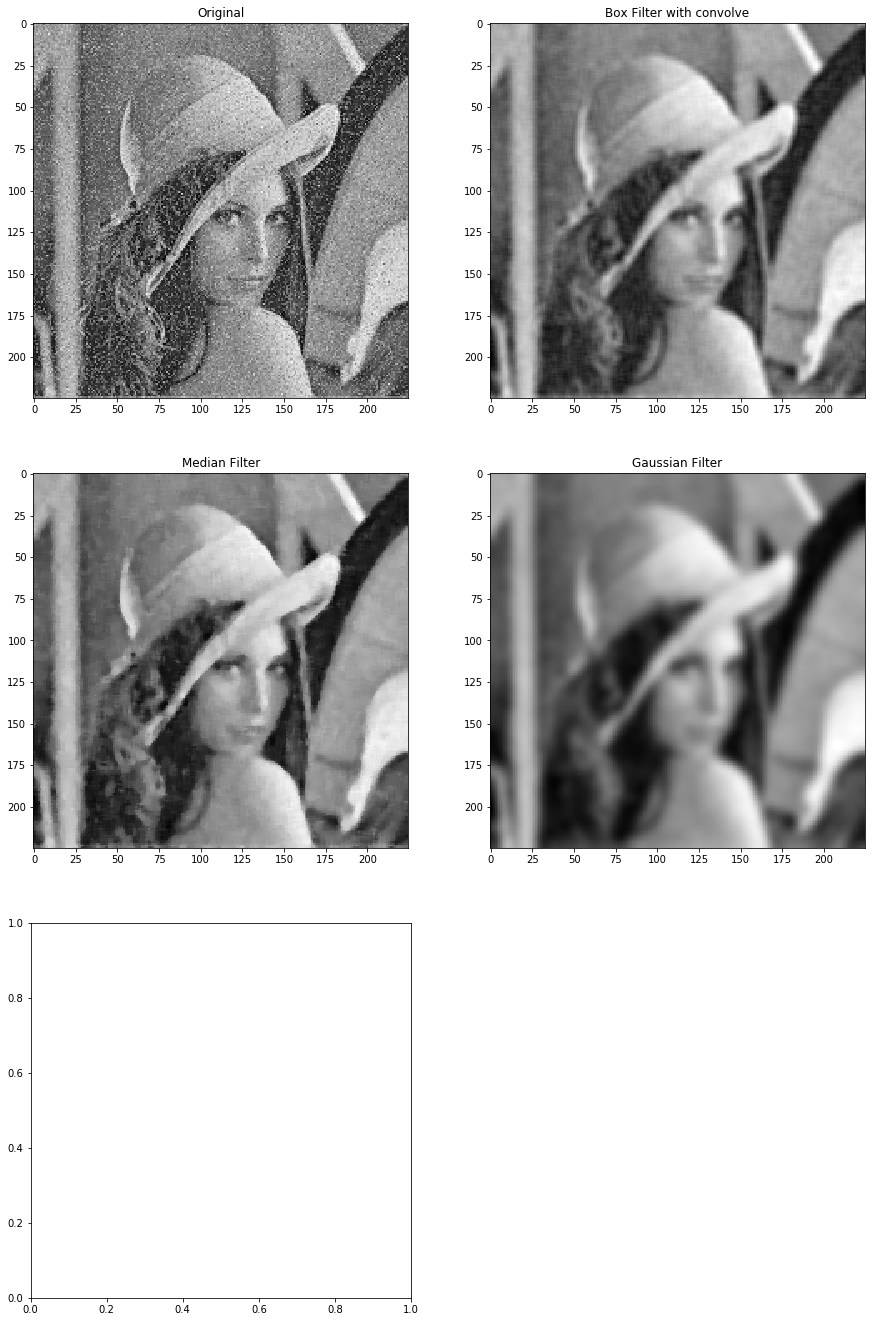

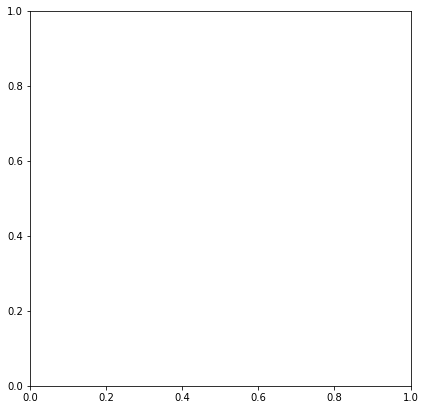

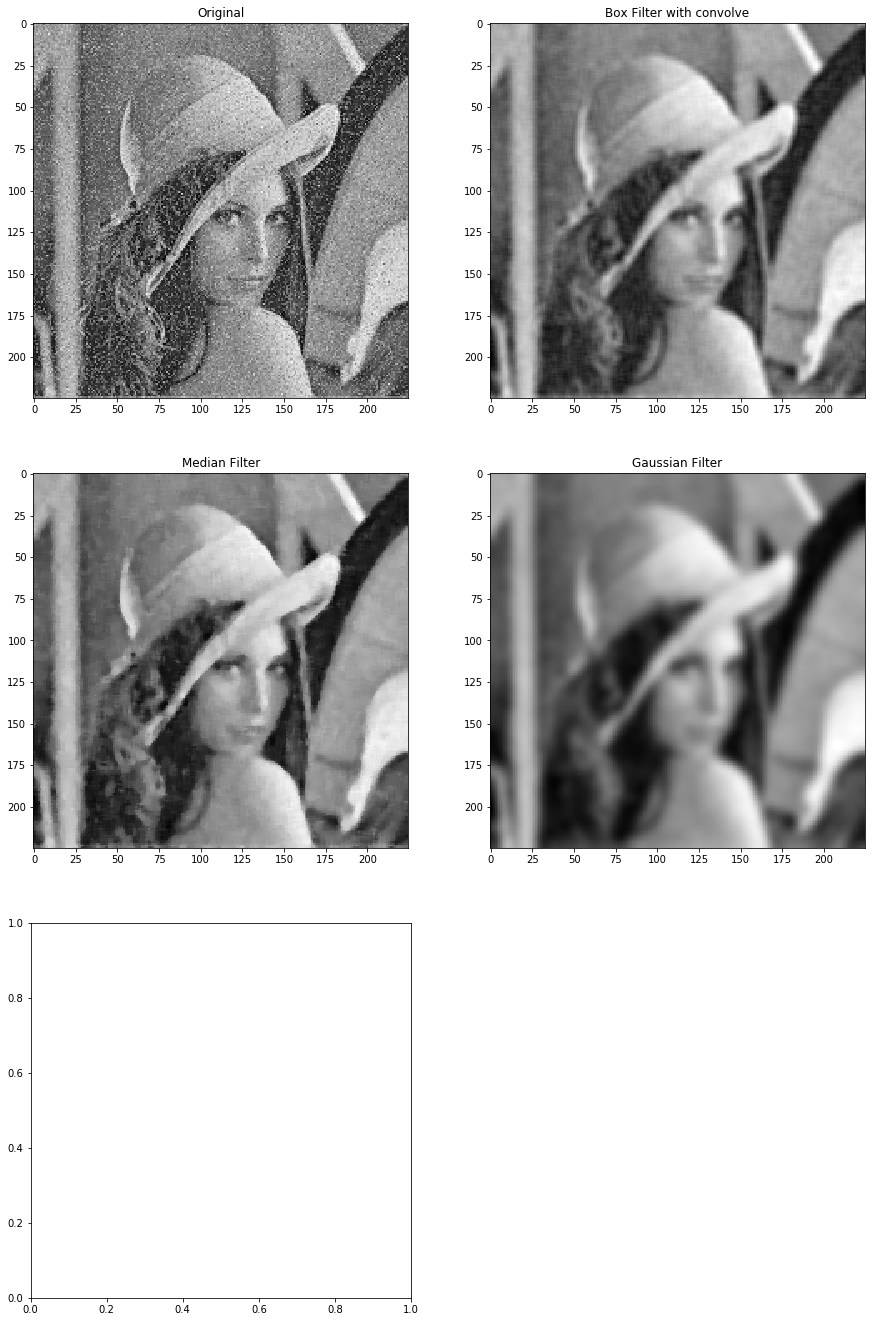

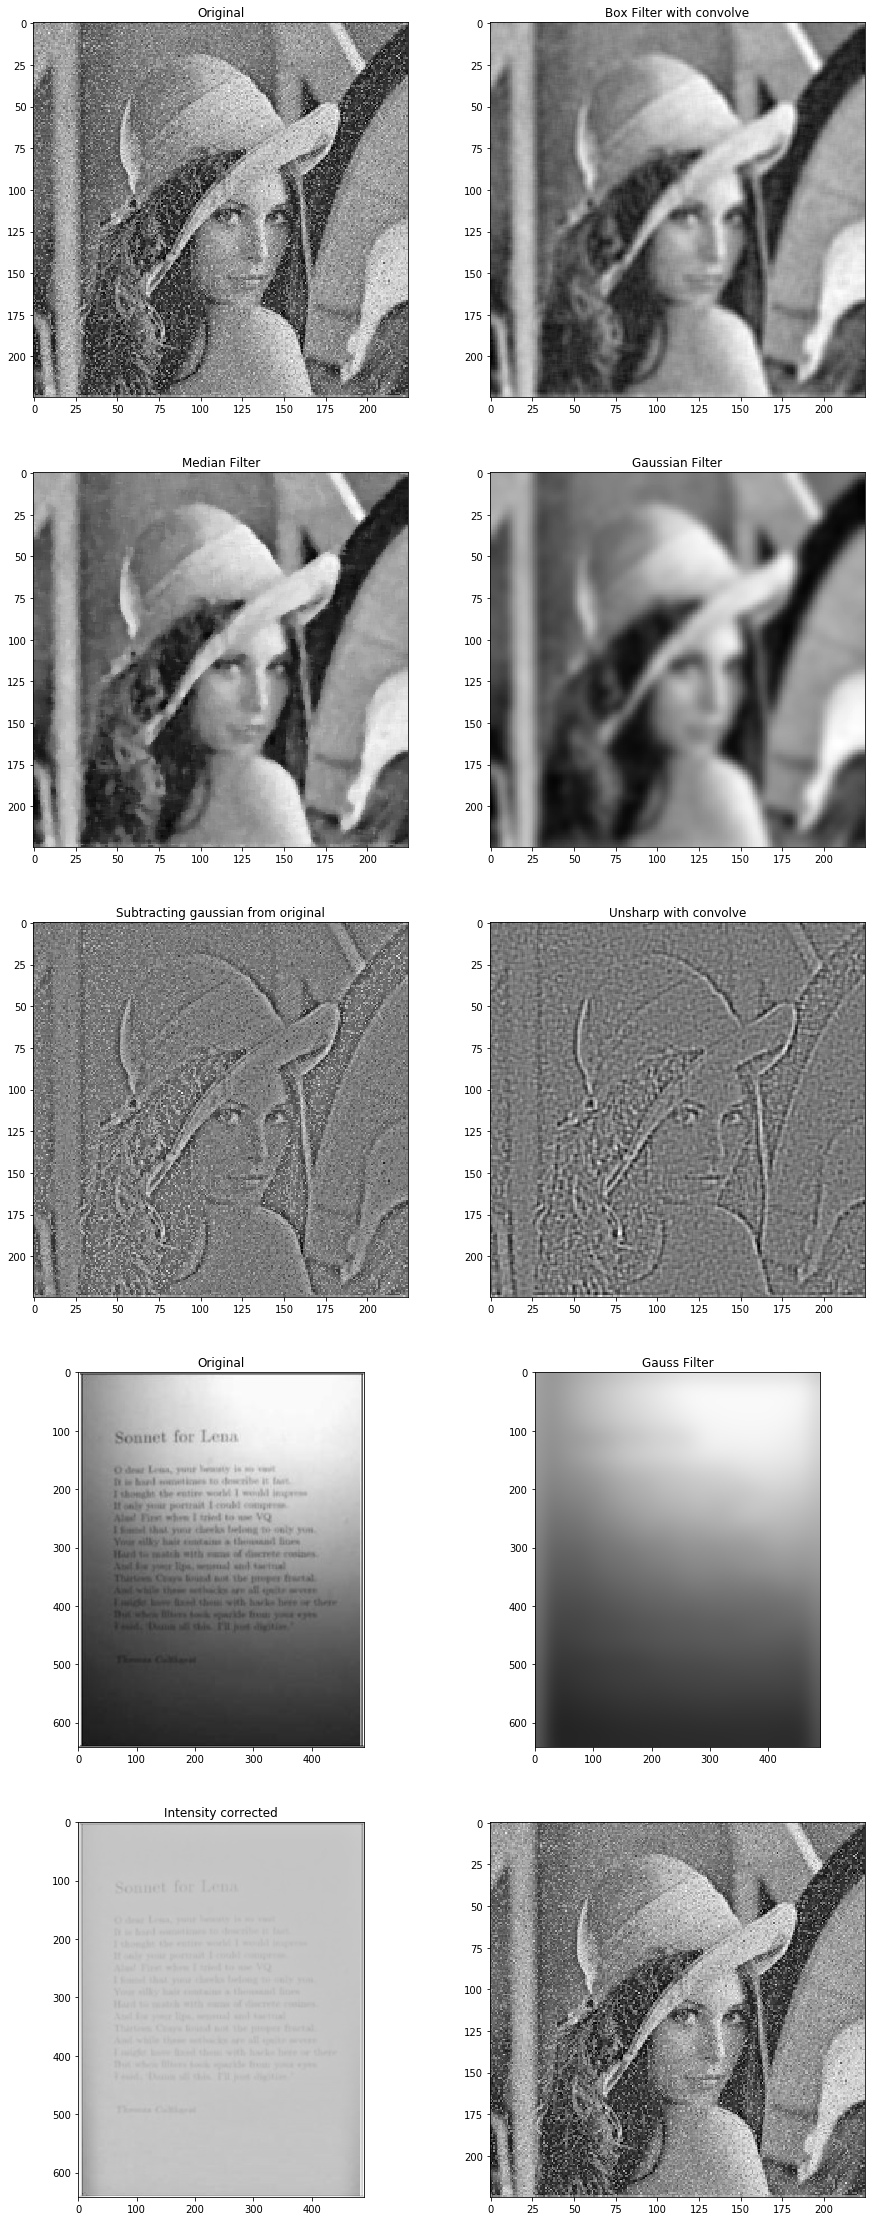

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import ndimage as ndimg
from PIL import Image
import math

#glena = Image.open('lena.jpg').convert('L')
glena = img.imread('lena.png')
book = img.imread('./book.png')
fig = plt.figure(figsize=(15,40))



# Box filter
boxcore = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
box = ndimg.convolve(glena, boxcore, mode='nearest', cval=0.0)


# Median filter
from scipy.ndimage.filters import median_filter
med = median_filter(glena, size=5)


# Gaussian filter
from scipy.ndimage.filters import gaussian_filter
gaus = gaussian_filter(glena, sigma=3)


# Substract original from gaussian filterd copy
subt = glena - gaus


# Unsharp via convolve
unsharpCore = np.array([[-1, -1, -1, -1, -1],
                       [-1,  1,  2,  1, -1],
                       [-1,  2,  4,  2, -1],
                       [-1,  1,  2,  1, -1],
                       [-1, -1, -1, -1, -1]])
unsharp = ndimg.convolve(glena, unsharpCore)


# Intensity correction
gausbook =  gaussian_filter(book, sigma=17)



r = np.log2(book) - np.log2(gausbook)
maxVal = r.max();
minVal = r.min();
print(minVal,maxVal)
icbook = (r - minVal)/(maxVal - minVal)
plt.subplot('521')




# Plotting
plt.subplot('521')
plt.imshow(glena, cmap='gray')
plt.title('Original')

plt.subplot('522')
plt.imshow(box, cmap='gray')
plt.title('Box Filter with convolve')

plt.subplot('523')
plt.imshow(med,cmap='gray')
plt.title('Median Filter')

plt.subplot('524')
plt.imshow(gaus,cmap='gray')
plt.title('Gaussian Filter')

plt.subplot('525')
plt.imshow(subt, cmap='gray')
plt.title('Subtracting gaussian from original')

plt.subplot('526')
plt.imshow(unsharp, cmap='gray')
plt.title('Unsharp with convolve')

plt.subplot('527')
plt.imshow(book, cmap='gray')
plt.title('Original')

plt.subplot('528')
plt.imshow(gausbook, cmap='gray')
plt.title('Gauss Filter')

plt.subplot('529')
plt.imshow(icbook, cmap='gray')
plt.title('Intensity corrected')

plt.subplot(5,2,10)
plt.imshow(glena, cmap='gray')




plt.show()